In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
from sklearn.preprocessing import LabelEncoder

df.set_index('customerID', inplace=True)

df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

df = pd.get_dummies(df, drop_first=True)

df.head()

C:\Users\b.yarinko\AppData\Local\Temp\ipykernel_20160\1897355497.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [7]:
X = df.drop('Churn_Yes', axis=1)
y = LabelEncoder().fit_transform(df['Churn_Yes'])

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_model = LogisticRegression(max_iter=500, random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict_proba(X_test)[:, 1]
log_auc = roc_auc_score(y_test, log_pred)
print(f"ROC AUC для логістичної регресії: {log_auc:.2f}")


ROC AUC для логістичної регресії: 0.84


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)
print(f"ROC AUC для случайного лісу: {rf_auc:.2f}")


ROC AUC для случайного лісу: 0.82


In [13]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_pred)
print(f"ROC AUC для градієнтного бустингу: {xgb_auc:.2f}")


ROC AUC для градієнтного бустингу: 0.83


In [14]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

svm_model = CalibratedClassifierCV(SVC(kernel='linear', probability=True, random_state=42))
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_pred)
print(f"ROC AUC для підтримки векторів: {svm_auc:.2f}")


ROC AUC для підтримки векторів: 0.83


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'Gradient Boosting': xgb_model,
    'Support Vector Machine': svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Logistic Regression:
Accuracy: 0.81, Precision: 0.66, Recall: 0.57, F1 Score: 0.61
Random Forest:
Accuracy: 0.79, Precision: 0.63, Recall: 0.49, F1 Score: 0.55
Gradient Boosting:
Accuracy: 0.79, Precision: 0.62, Recall: 0.55, F1 Score: 0.58
Support Vector Machine:
Accuracy: 0.79, Precision: 0.64, Recall: 0.51, F1 Score: 0.57


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print(f"Найкращий ROC AUC для случайного лісу: {best_rf_auc:.2f}")


Найкращий ROC AUC для случайного лісу: 0.84


In [18]:
df.Churn_Yes

customerID
7590-VHVEG    False
5575-GNVDE    False
3668-QPYBK     True
7795-CFOCW    False
9237-HQITU     True
              ...  
6840-RESVB    False
2234-XADUH    False
4801-JZAZL    False
8361-LTMKD     True
3186-AJIEK    False
Name: Churn_Yes, Length: 7043, dtype: bool

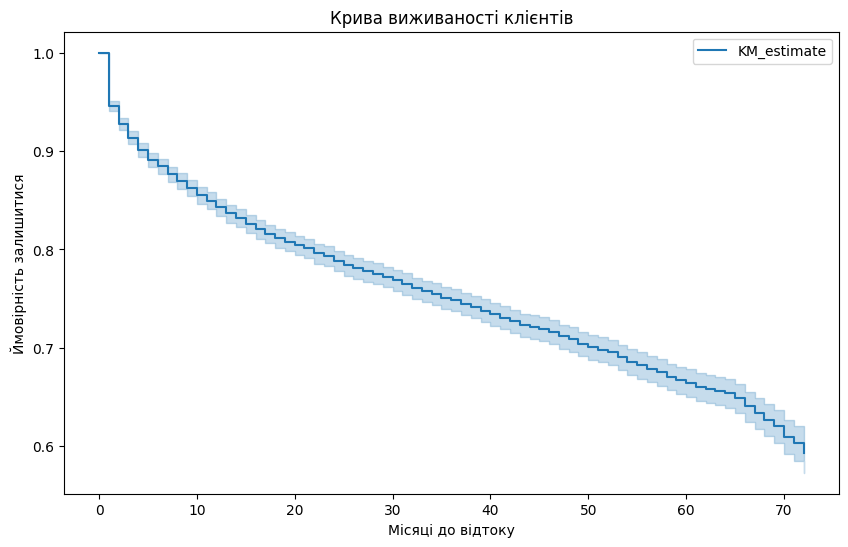

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'time_to_churn'
                event col = 'churn_event'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12800.45
         time fit was run = 2024-11-18 23:23:06 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
MonthlyCharges     0.05      1.06      0.00            0.05            0.06                1.05                1.06
TotalCharges      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Contract_One year -1.74      0.18      0.10           -1.93           -1.55                0.15                0.21
Contract_Two year -4.54      0.01      0.19           -4.91           -4.18                0.01                0.02

                   cmp to      z      p  -log2(p)
covariate                                        
MonthlyCharges       0.00  36.00 <0.005    940.43
TotalCharges         0.00 -43.72 <0.005       inf
Contract_One year    0.00 -17.94 <0.005    236.75
Contract_Two year    0.00 -24.40 <0.005    434.23
---
Concordance = 0.92
Partial AIC = 25608.90
log-likelihood ratio test = 5705.17 on 4 df
-log2(p) of ll-ratio test = inf

In [20]:
from lifelines import KaplanMeierFitter, CoxPHFitter

# Створення змінної "час до відтоку"
df['time_to_churn'] = df['tenure']  # tenure вказує місяці перебування клієнта

# Бінарна змінна для події (1 = відтік, 0 = залишився)
df['churn_event'] = df['Churn_Yes'].astype(int)

# Kaplan-Meier Model
kmf = KaplanMeierFitter()
kmf.fit(durations=df['time_to_churn'], event_observed=df['churn_event'])

# Візуалізація виживаності
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Крива виживаності клієнтів")
plt.xlabel("Місяці до відтоку")
plt.ylabel("Ймовірність залишитися")
plt.show()

# Cox Proportional Hazards Model
# Вибір змінних для моделі
cox_data = df[['time_to_churn', 'churn_event', 'MonthlyCharges', 'TotalCharges', 'Contract_One year', 'Contract_Two year']]
cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='time_to_churn', event_col='churn_event')

# Результати моделі
cox_model.print_summary()

# Прогноз часу до відтоку для кожного клієнта
df['predicted_time_to_churn'] = cox_model.predict_expectation(cox_data)


In [21]:
# Додавання ймовірності відтоку (з попередньої моделі)
df['churn_probability'] = rf_model.predict_proba(X)[:, 1]  # Використання Random Forest моделі

# Розрахунок втрат
df['predicted_loss'] = df['MonthlyCharges'] * df['predicted_time_to_churn'] * df['churn_probability']

# Загальні прогнозовані втрати
total_loss = df['predicted_loss'].sum()
print(f"Прогнозовані втрати внаслідок відтоку: ${total_loss:,.2f}")


Прогнозовані втрати внаслідок відтоку: $4,336,104.98


c:\Users\b.yarinko\Desktop\Code\customer_churn\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [22]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,time_to_churn,churn_event,predicted_time_to_churn,churn_probability,predicted_loss
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,False,True,False,False,True,False,...,True,False,True,False,False,1,0,22.481846,0.25,167.770774
5575-GNVDE,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,34,0,50.025968,0.24,683.754930
3668-QPYBK,0,2,53.85,108.15,True,False,False,True,False,False,...,True,False,False,True,True,2,1,12.935173,0.21,146.277402
7795-CFOCW,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,False,45,0,55.683062,0.28,659.510192
9237-HQITU,0,2,70.70,151.65,False,False,False,True,False,False,...,True,False,True,False,True,2,1,7.296783,0.34,175.400077


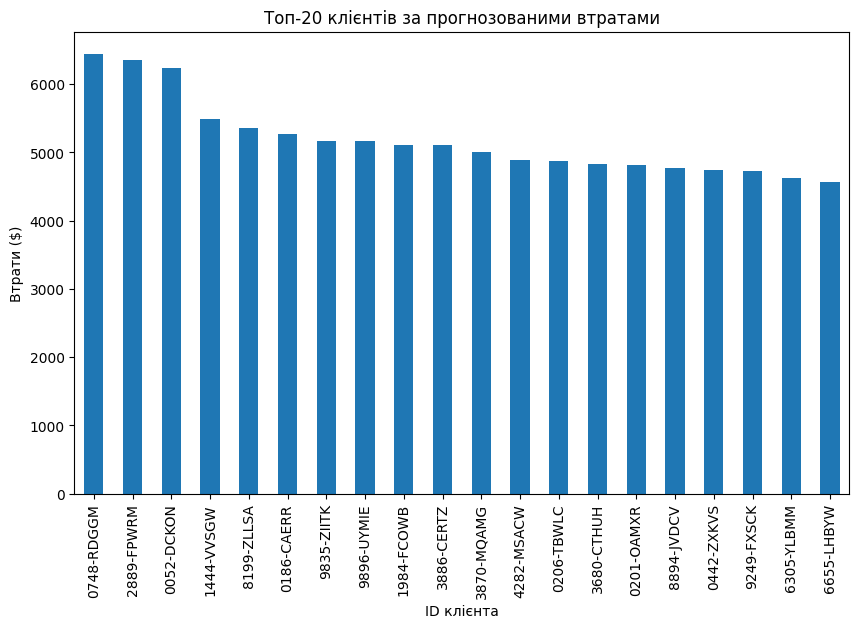

In [23]:
# Візуалізація прогнозованих втрат
plt.figure(figsize=(10, 6))
df.sort_values('predicted_loss', ascending=False)['predicted_loss'].head(20).plot(kind='bar')
plt.title("Топ-20 клієнтів за прогнозованими втратами")
plt.xlabel("ID клієнта")
plt.ylabel("Втрати ($)")
plt.show()
